In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/My projects/Billionaires data analysis/Billionaires Statistics Dataset.csv")

In [4]:
columns_to_remove = ['gdp_country', 'life_expectancy_country', 'total_tax_rate_country', 'population', 'latitude', 'longitude']

# Drop the specified columns
df = df.drop(columns=columns_to_remove)

In [5]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthYear', 'birthMonth'],
      dtype='object')

In [6]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250
std,739.693726,9834.240939,13.258098,13.282516,3.710085
min,1.000000,1000.000000,18.000000,1921.000000,1.000000
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000


In [7]:
print(df.head())

   rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city             industries countryOfCitizenship  \
0         France   Paris       Fashion & Retail               France   
1  United States  Austin             Automotive        United States   
2  United States  Medina             Technology        United States   
3  United States   Lanai             Technology        United States   
4  United States   Omaha  Finance & Investments        United States   

                       organization  selfMade status gender  birthYear  \
0  LVMH Moët Hennessy Lo

In [8]:

df['finalWorth'] = df['finalWorth'] / 1000


In [9]:
df.head()

,rank,finalWorth,category,personName,age,country,city,industries,countryOfCitizenship,organization,selfMade,status,gender,birthYear,birthMonth
0,1,211.0,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,1949.0,3.0
1,2,180.0,Automotive,Elon Musk,51.0,United States,Austin,Automotive,United States,Tesla,True,D,M,1971.0,6.0
2,3,114.0,Technology,Jeff Bezos,59.0,United States,Medina,Technology,United States,Amazon,True,D,M,1964.0,1.0
3,4,107.0,Technology,Larry Ellison,78.0,United States,Lanai,Technology,United States,Oracle,True,U,M,1944.0,8.0
4,5,106.0,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,1930.0,8.0


In [10]:
wealth_stats = df['finalWorth'].describe()
print("\nSummary Statistics of Wealth:")
print(wealth_stats)


Summary Statistics of Wealth:
count    2640.000000
mean        4.623788
std         9.834241
min         1.000000
25%         1.500000
50%         2.300000
75%         4.200000
max       211.000000
Name: finalWorth, dtype: float64


In [11]:
# Count the number of self-made and inherited billionaires
self_made_counts = df['selfMade'].value_counts()
print("\nCounts of Self-Made and Inherited Billionaires:")
print(self_made_counts)


Counts of Self-Made and Inherited Billionaires:
True     1812
False     828
Name: selfMade, dtype: int64


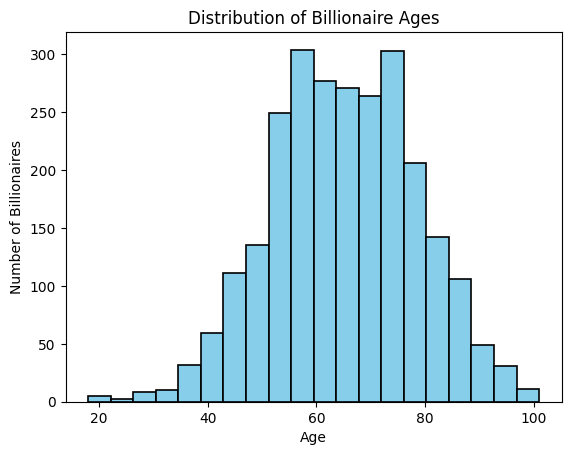

In [12]:
# Create a histogram of billionaire ages with borders
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black', linewidth=1.2)
plt.xlabel("Age")
plt.ylabel("Number of Billionaires")
plt.title("Distribution of Billionaire Ages")
plt.show()


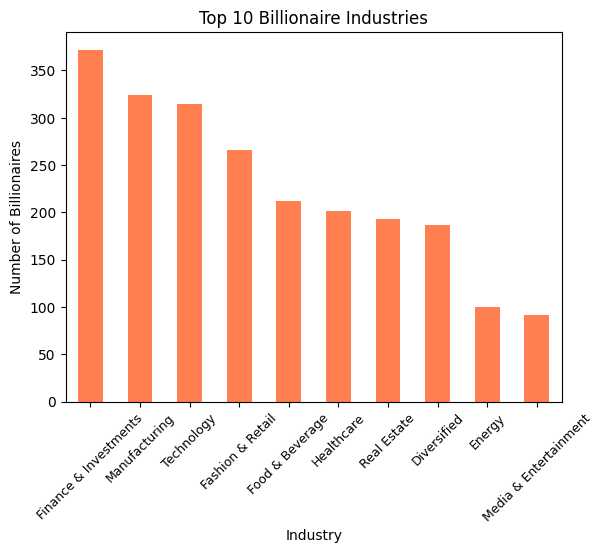

In [13]:
#Create a bar chart to visualize the top 10 billionaire industries
top_industries = df['category'].value_counts().head(10)
top_industries.plot(kind='bar', color='coral')
plt.xlabel("Industry")
plt.ylabel("Number of Billionaires")
plt.title("Top 10 Billionaire Industries")
plt.xticks(rotation=45,fontsize=9)
plt.show()

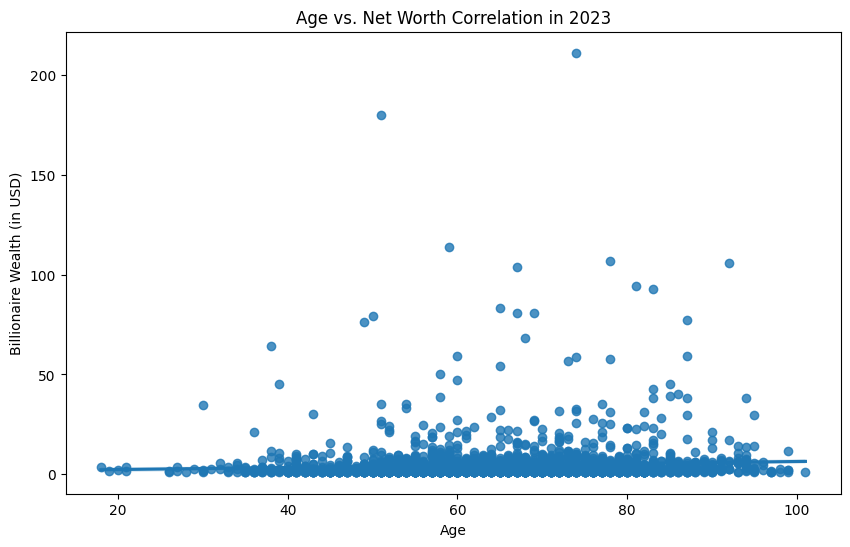

In [14]:
# Create a scatter plot with a regression line to visualize the relationship between age and net worth
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='age', y='finalWorth')
plt.xlabel('Age')
plt.ylabel('Billionaire Wealth (in USD)')
plt.title('Age vs. Net Worth Correlation in 2023')
plt.show()


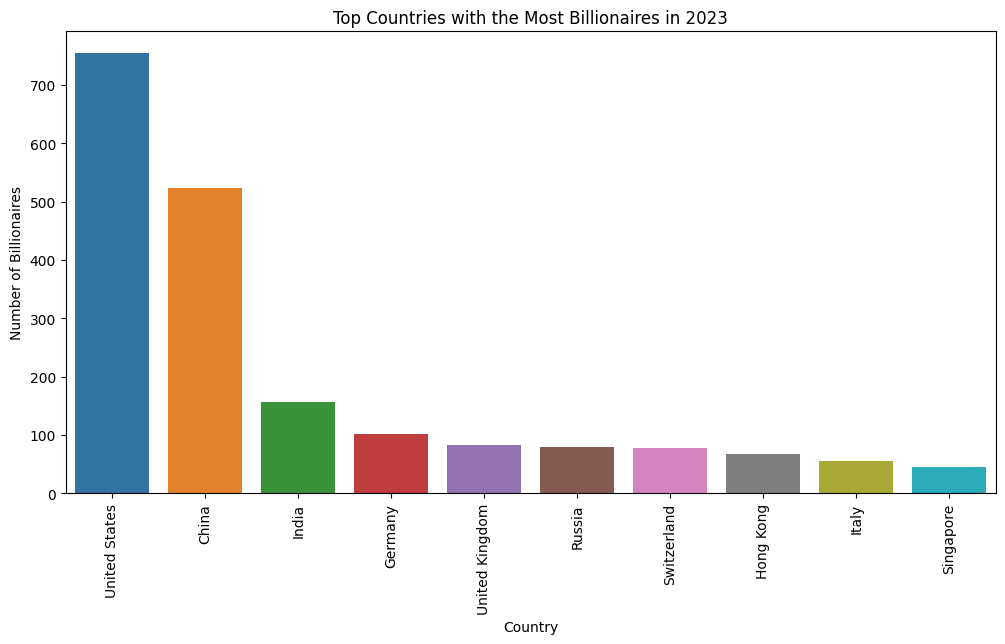

In [15]:
# Create a bar chart to visualize the top countries with the most billionaires
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.title('Top Countries with the Most Billionaires in 2023')
plt.show()


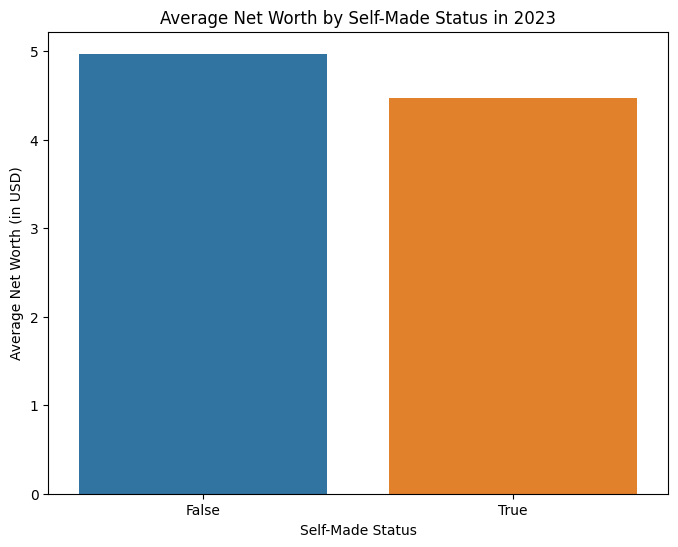

In [17]:
average_net_worth = df.groupby('selfMade')['finalWorth'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=average_net_worth.index, y=average_net_worth.values)
plt.xlabel('Self-Made Status')
plt.ylabel('Average Net Worth (in USD)')
plt.title('Average Net Worth by Self-Made Status in 2023')
plt.show()

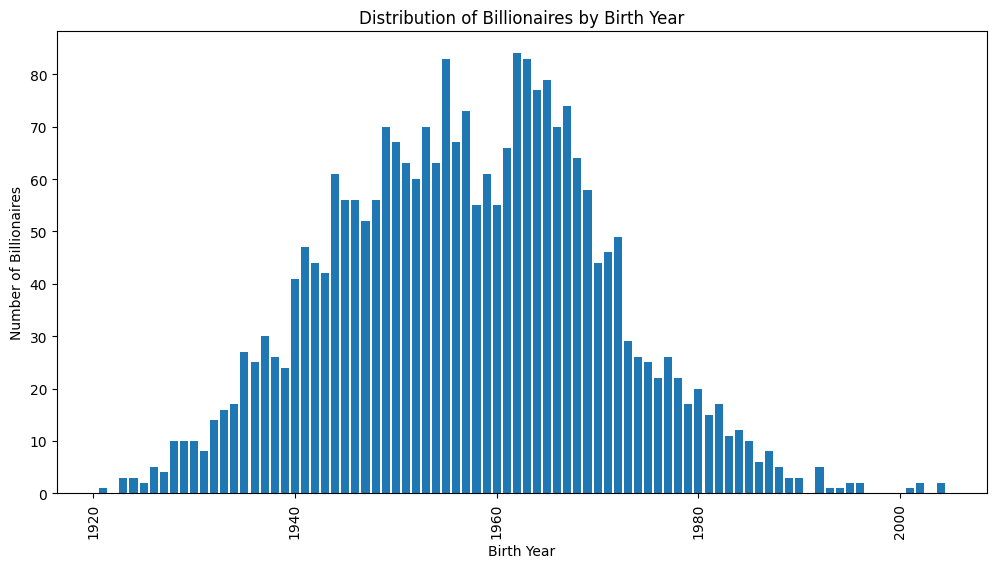

In [ ]:
birth_year_counts = df['birthYear'].value_counts()
birth_year_counts = birth_year_counts.sort_index()
plt.figure(figsize=(12, 6))
plt.bar(birth_year_counts.index, birth_year_counts.values)
plt.xlabel('Birth Year')
plt.ylabel('Number of Billionaires')
plt.title('Distribution of Billionaires by Birth Year')
plt.xticks(rotation=90)
plt.show()

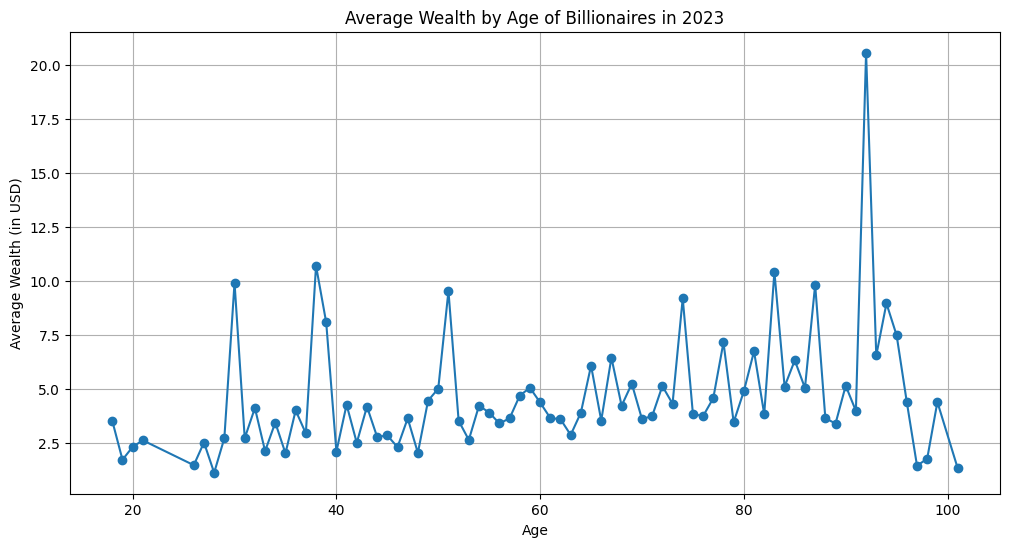

In [ ]:
age_vs_wealth = df.groupby('age')['finalWorth'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(age_vs_wealth['age'], age_vs_wealth['finalWorth'], marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Average Wealth (in USD)')
plt.title('Average Wealth by Age of Billionaires in 2023')
plt.grid(True)
plt.show()

ANALYISIS ON INDIANS

In [ ]:
india_data = df[df['country'] == 'India']

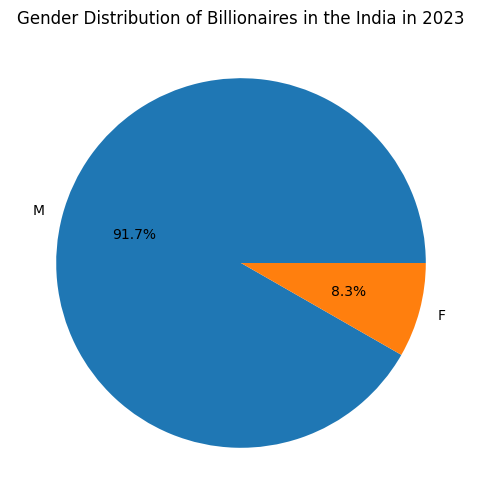

In [ ]:
gender_data = df[df['country'] == 'India']['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_data, labels=gender_data.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Billionaires in the India in 2023')
plt.show()


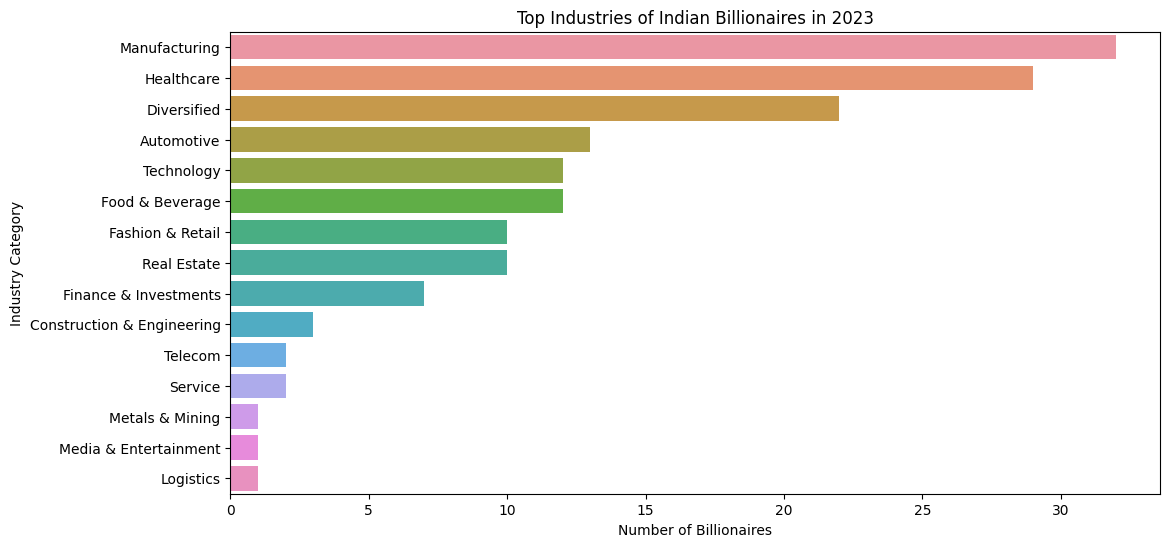

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=india_data, y='category', order=india_data['category'].value_counts().index)
plt.xlabel('Number of Billionaires')
plt.ylabel('Industry Category')
plt.title('Top Industries of Indian Billionaires in 2023')
plt.show()

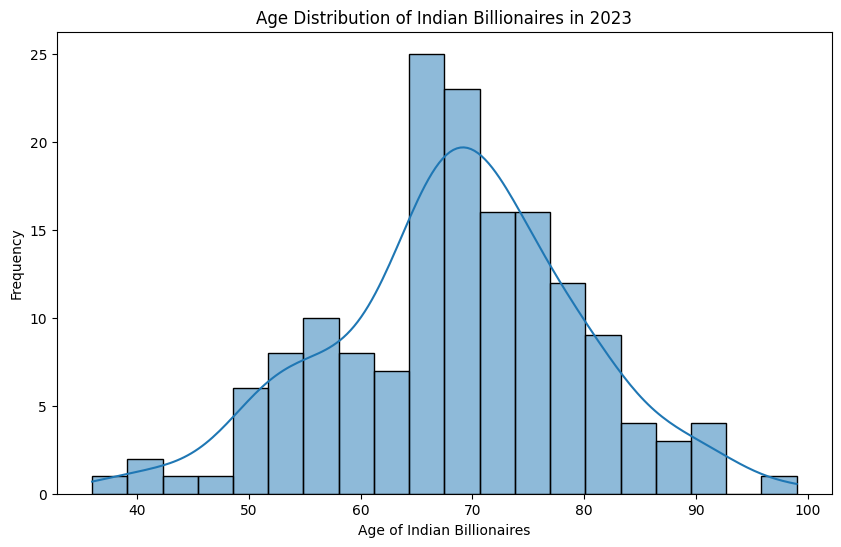

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=india_data, x='age', bins=20, kde=True)
plt.xlabel('Age of Indian Billionaires')
plt.ylabel('Frequency')
plt.title('Age Distribution of Indian Billionaires in 2023')
plt.show()

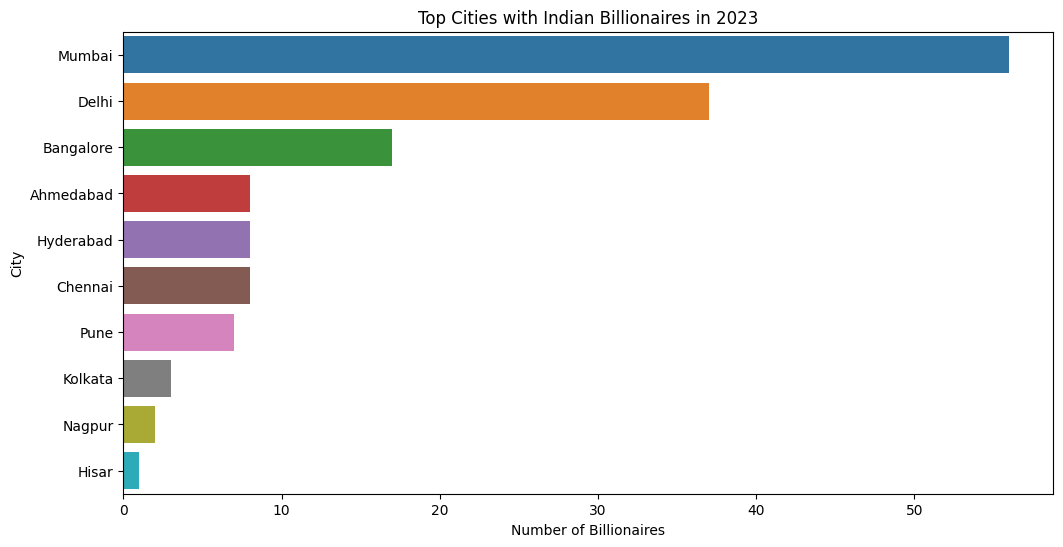

In [ ]:
#Top cities with Indian billionaires
top_cities = india_data['city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.xlabel('Number of Billionaires')
plt.ylabel('City')
plt.title('Top Cities with Indian Billionaires in 2023')
plt.show()